In [3]:
import keras
from keras import layers
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

# Tell the time network on smaller Dataset
## Starting with regression approach

In [4]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [5]:
X = np.load('A1_data_75/images.npy')
X = X/255
y = np.load('A1_data_75/labels.npy')

In [9]:
y_min = np.array([i *60 +j for i,j in y])
y_hour_min = np.array([(i + j/60) for i, j in y])
y_cycle = np.array([[np.sin((2*np.pi*i)/720),np.cos((2*np.pi*i)/720)] for i in y_min])

In [10]:
y_reg = y_cycle

In [11]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X,y_reg,test_size=0.1) 

In [67]:
model = keras.Sequential()
shape = X_reg_train.shape[1:]
input_shape = shape + (1,)

In [68]:
model.add(layers.Conv2D(filters=16,kernel_size=(5,5),input_shape = input_shape))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(filters=32, kernel_size=(5,5)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(2, activation="linear"))

/home/jaspe/miniconda3/envs/tf_gpu/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.compile(optimizer="adam",loss="mse", metrics=["mae"])

In [70]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 71, 71, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 35, 35, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 31, 31, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281,986 (1.08 MB)

 Trainable params: 281,986 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
hist = model.fit(
    X_reg_train,y_reg_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32
)

Epoch 1/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.4980 - mae: 0.6310 - val_loss: 0.4686 - val_mae: 0.6007
Epoch 2/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3835 - mae: 0.5319 - val_loss: 0.2714 - val_mae: 0.4413
Epoch 3/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2210 - mae: 0.3849 - val_loss: 0.1156 - val_mae: 0.2696
Epoch 4/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1411 - mae: 0.3021 - val_loss: 0.0838 - val_mae: 0.2274
Epoch 5/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1106 - mae: 0.2663 - val_loss: 0.0621 - val_mae: 0.1951
Epoch 6/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0960 - mae: 0.2476 - val_loss: 0.0564 - val_mae: 0.1828
Epoch 7/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0834 - mae: 0.2300 - val_loss: 0.0504 - val_mae: 0.1801
Epoch 8/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0749 - mae: 0.2179 - val_loss: 0.0451 - val_mae: 0.1646
Epoch 9/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

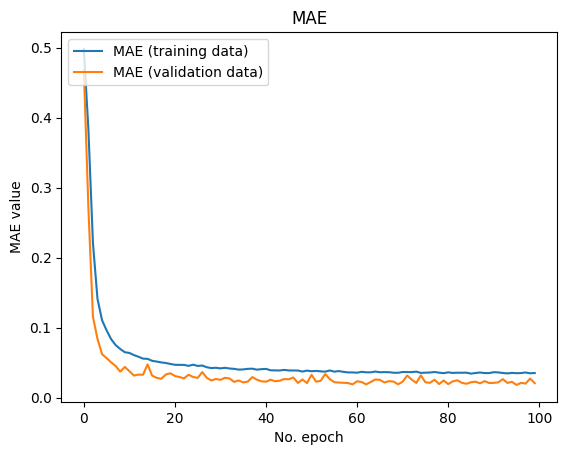

In [72]:
import matplotlib.pyplot as plt

# Plot history: MAE
plt.plot(hist.history['loss'], label='MAE (training data)')
plt.plot(hist.history['val_loss'], label='MAE (validation data)')
plt.title('MAE')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [73]:
def decode_target_vals(y):
    angles_pred = np.arctan2(y[:, 0], y[:, 1])
    decoded = (angles_pred / (2 * np.pi)) * 720
    return (decoded+720)%720

In [74]:
y_reg_pred = model.predict(X_reg_test)
y_reg_test = decode_target_vals(y_reg_test)
y_reg_pred = decode_target_vals(y_reg_pred)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [77]:
error = np.abs(y_reg_pred - y_reg_test)
error = np.minimum(error, 720 - error)
mae = np.mean(error)
print("Mean Absolute Error (in minutes):", mae)

Mean Absolute Error (in minutes): 14.165698903401692


## Classification

In [6]:
## Built calssification model whith half hour buckets
y_30_min_bins = np.array([int(round((i *60 +j)/30,0)) for i,j in y])
y_20_min_bins = np.array([int(round((i *60 +j)/20,0)) for i,j in y])
y_10_min_bins = np.array([int(round((i *60 +j)/10,0)) for i,j in y])


y_clas = y_30_min_bins
X_clas_train, X_clas_test, y_clas_train, y_clas_test = train_test_split(X,y_clas, test_size=0.1) 

In [7]:
shape = X_clas_train.shape[1:]
input_shape = shape + (1,)
output_nodes = max(y_clas) +1 
model_class = keras.Sequential()


In [ ]:
model_class.add(layers.Conv2D(filters=16,kernel_size=(5,5),input_shape = input_shape))
model_class.add(layers.MaxPooling2D((2,2)))

model_class.add(layers.Conv2D(filters=32, kernel_size=(5,5)))
model_class.add(layers.MaxPooling2D((2,2)))

model_class.add(layers.Conv2D(filters=64, kernel_size=(3,3)))
model_class.add(layers.Conv2D(filters=64, kernel_size=(3,3)))
model_class.add(layers.MaxPooling2D((2,2)))

model_class.add(layers.Flatten())
model_class.add(layers.Dense(256, activation="relu"))
model_class.add(layers.Dropout(0.15))

model_class.add(layers.Dense(128, activation="relu"))
model_class.add(layers.Dropout(0.15))

model_class.add(layers.Dense(64, activation="relu"))
model_class.add(layers.Dropout(0.15))

model_class.add(layers.Dense(output_nodes, activation="softmax"))

c:\Users\jaspe\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model_class.compile(optimizer="adam",loss="sparse_categorical_crossentropy" )

In [49]:
hist_clas = model_class.fit(
    X_clas_train,y_clas_train,
    validation_data=(X_clas_test,y_clas_test),
    epochs=100,
    batch_size=32
)

Epoch 1/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - loss: 3.2202 - val_loss: 3.2194
Epoch 2/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - loss: 3.2130 - val_loss: 3.2098
Epoch 3/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - loss: 3.2051 - val_loss: 3.1633
Epoch 4/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - loss: 3.0690 - val_loss: 2.8417
Epoch 5/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - loss: 2.7577 - val_loss: 2.4039
Epoch 6/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - loss: 2.4756 - val_loss: 2.1182
Epoch 7/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - loss: 2.2814 - val_loss: 1.9211
Epoch 8/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - loss: 2.1290 - val_loss: 1.7534
Epoch 9/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - loss: 1.9880 - val_loss: 1.6176
Epoch 10/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - loss: 1.8439 - val_loss: 1.4604
Epoch 11/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - loss: 1.7523 - val_loss: 1.3688
Epoch 12/100
507/50

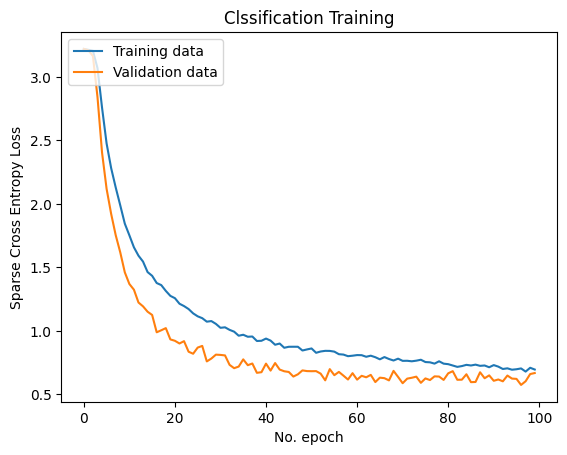

In [50]:
import matplotlib.pyplot as plt 

plt.plot(hist_clas.history['loss'], label='Training data')
plt.plot(hist_clas.history['val_loss'], label='Validation data')
plt.title('Clssification Training')
plt.ylabel('Sparse Cross Entropy Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [60]:
from sklearn.metrics._classification import classification_report
y_pred = model_class.predict(X_clas_test)
y_pred = [np.argmax(i) for i in y_pred]

print(classification_report(y_true=y_clas_test, y_pred=y_pred))


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
              precision    recall  f1-score   support

           0       0.70      0.48      0.57        48
           1       0.79      0.82      0.81        66
           2       0.61      0.79      0.69        81
           3       0.80      0.82      0.81        67
           4       0.86      0.61      0.72        83
           5       0.86      0.84      0.85        79
           6       0.73      0.87      0.80        63
           7       0.92      0.78      0.84        69
           8       0.85      0.72      0.78        81
           9       0.78      0.76      0.77        83
          10       0.75      0.84      0.79        88
          11       0.68      0.90      0.78        72
          12       0.87      0.77      0.82        71
          13       0.90      0.59      0.71        75
          14       0.86      0.86      0.86        76
          15       0.63      0.86      0.73        64
          16       0.90      0.86      0.

In [ ]:
y_clas = y_20_min_bins
X_clas_train, X_clas_test, y_clas_train, y_clas_test = train_test_split(X,y_clas, test_size=0.1) 
output_nodes = max(y_clas) +1 


In [2]:



x = model_class.layers[-2].output

# Create new output for a new task
new_output = keras.layers.Dense(output_nodes, activation='linear')(x)

# Create a new model
new_model = keras.Model(inputs=model_class.input, outputs=new_output)


NameError: name 'model_class' is not defined

In [19]:
###TODO model with head configuration

In [20]:
###TODO the last part with the sin/cosine target val